<a href="https://colab.research.google.com/github/LaisVilla/Imersao_Python_Alura/blob/main/Imers%C3%A3o_Python_Aula_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão de Séries Temporais de Ações e Carreiras no Mercado de Dados

In [30]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from prophet import Prophet

In [31]:
# Baixar dados dos últimos quatro anos para uma ação específico
dados = yf.download("TSLA", start="2018-01-01", end="2018-12-31", progress=False)
dados = dados.reset_index()
dados

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000
1,2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500
2,2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500
3,2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000
4,2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000
...,...,...,...,...,...,...,...
245,2018-12-21,21.160000,21.564667,20.829332,21.318001,21.318001,120252000
246,2018-12-24,20.900000,20.966667,19.680000,19.692667,19.692667,83398500
247,2018-12-26,20.000000,21.798000,19.606001,21.739332,21.739332,122446500
248,2018-12-27,21.322666,21.478001,20.100000,21.075333,21.075333,128626500


In [32]:
# Vamos dividir os dados em treino (até o final do primeiro semestre de 2018) e teste (segundo semestre de 2018)
dados_treino = dados[dados['Date'] < '2018-07-31']
dados_teste = dados[dados['Date'] >= '2018-07-31']
dados_treino
dados_teste

,Date,Open,High,Low,Close,Adj Close,Volume
145,2018-07-31,19.483334,19.888000,19.271334,19.875999,19.875999,76153500
146,2018-08-01,19.865999,20.200001,19.533333,20.056000,20.056000,151941000
147,2018-08-02,21.896000,23.332666,21.544001,23.302668,23.302668,348225000
148,2018-08-03,23.187332,23.666668,22.835333,23.211332,23.211332,204847500
149,2018-08-06,23.030666,23.665333,22.788000,22.799334,22.799334,128464500
...,...,...,...,...,...,...,...
245,2018-12-21,21.160000,21.564667,20.829332,21.318001,21.318001,120252000
246,2018-12-24,20.900000,20.966667,19.680000,19.692667,19.692667,83398500
247,2018-12-26,20.000000,21.798000,19.606001,21.739332,21.739332,122446500
248,2018-12-27,21.322666,21.478001,20.100000,21.075333,21.075333,128626500


In [33]:
# Preparando os dados para o FBProphet
dados_prophet_treino = dados_treino[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
dados_prophet_treino

,ds,y
0,2018-01-02,21.368668
1,2018-01-03,21.150000
2,2018-01-04,20.974667
3,2018-01-05,21.105333
4,2018-01-08,22.427334
...,...,...
140,2018-07-24,19.828667
141,2018-07-25,20.582666
142,2018-07-26,20.443333
143,2018-07-27,19.812000


In [34]:
# Criar e treinar o modelo
modelo = Prophet(weekly_seasonality=True,
                 yearly_seasonality=True,
                 daily_seasonality=False)
modelo.add_country_holidays(country_name='US')

modelo.fit(dados_prophet_treino)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpdp4yi2j4/r9unjudr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdp4yi2j4/5d_1uzx4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1926', 'data', 'file=/tmp/tmpdp4yi2j4/r9unjudr.json', 'init=/tmp/tmpdp4yi2j4/5d_1uzx4.json', 'output', 'file=/tmp/tmpdp4yi2j4/prophet_modelycktk_sy/prophet_model-20240401020844.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:08:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:08:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [35]:
# Criar datas futuras para a previsão até o final de 2023
futuro = modelo.make_future_dataframe(periods=150)
previsao = modelo.predict(futuro)


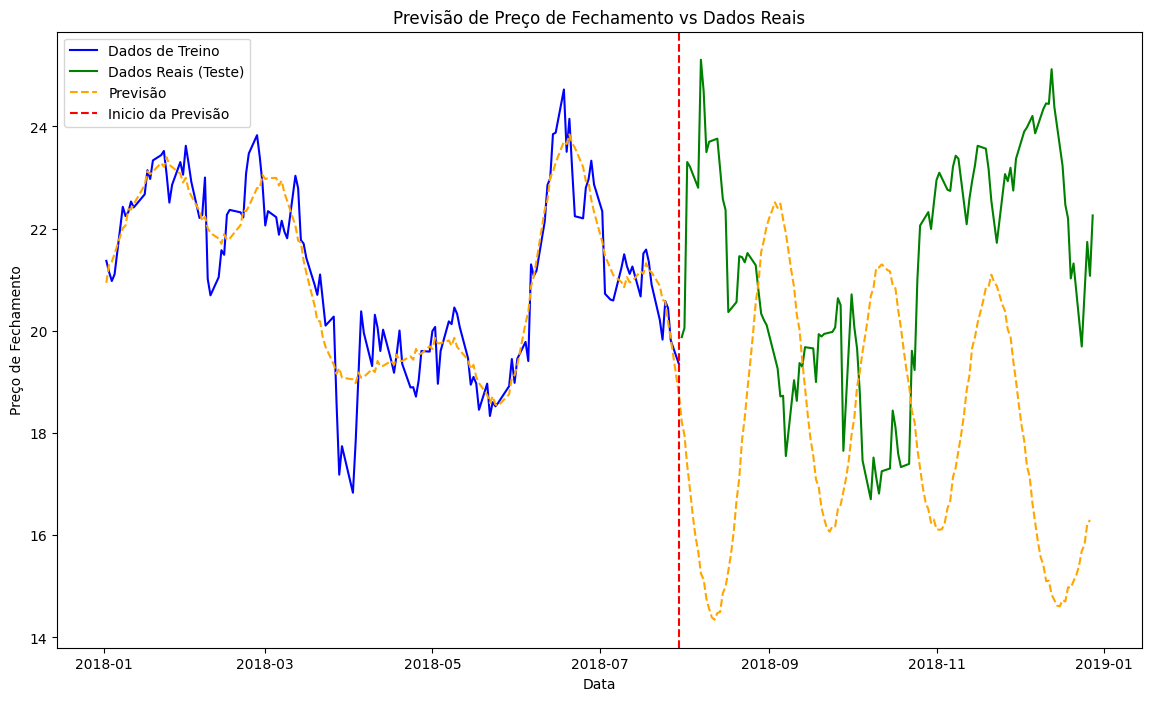

In [36]:
# Plotar os dados de treino, teste e previsões
plt.figure(figsize=(14,8))
plt.plot(dados_treino['Date'], dados_treino['Close'], label= 'Dados de Treino', color='blue')
plt.plot(dados_teste['Date'], dados_teste['Close'], label='Dados Reais (Teste)', color='green')
plt.plot(previsao['ds'], previsao['yhat'], label='Previsão', color='orange', linestyle='--')

plt.axvline(dados_treino['Date'].max(), color='red', linestyle='--', label='Inicio da Previsão')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsão de Preço de Fechamento vs Dados Reais')
plt.legend()
plt.show()
